# Урок 3. Домашнее задание

## Описательная статистика. Качественные и количественные характеристики популяции. Графическое представление данных

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Задача 3.1

Даны значения зарплат из выборки выпускников: 
```
100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.
```
Без использования статистических функций вроде `mean`, `std`, `var`, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.


#### Решение

In [2]:
salary = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])

```mean``` Среднее арифметическое: 

$\overline{x} = \dfrac{1}{m} \displaystyle\sum_{i = 1}^m x_i.$

In [3]:
mean = sum(salary)/salary.shape[0]
mean

65.3

In [4]:
salary.mean()

65.3

```std``` Среднеквадратичное отклонение:

$\sigma = \sqrt{\dfrac{1}{m} \displaystyle\sum_{i = 1}^m (x_i - \overline{x})^2}.$

In [5]:
np.math.sqrt(sum((salary - mean)**2) / salary.shape[0])

30.823854398825596

In [6]:
salary.std()

30.823854398825596

```var```. __Смещённая__ выборочная дисперсия:

$\sigma^2 = \dfrac{1}{m} \displaystyle\sum_{i = 1}^m (x_i - \overline{x})^2.$

In [7]:
sum((salary - mean)**2) / salary.shape[0]

950.11

In [8]:
salary.var(ddof=0)

950.11

```var```. __Несмещённая__ (или __исправленная__) выборочная дисперсия :

$\sigma_{\text{unbiased}}^2 = \dfrac{1}{m - 1} \displaystyle\sum_{i = 1}^m (x_i - \overline{x})^2.$

In [9]:
sum((salary - mean)**2) / (salary.shape[0] - 1)

1000.1157894736842

In [10]:
salary.var(ddof=1)

1000.1157894736842

### Задача 3.2

Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из `boxplot`. В этой задаче можно использовать статистические функции.

#### Решение

In [11]:
# Первый и третий квартили
q1 = np.quantile(salary, 0.25)
q3 = np.quantile(salary, 0.75)
q1, q3

(42.0, 81.0)

In [12]:
# Интерквартильное расстояние
iqr = q3 - q1
iqr

39.0

In [13]:
# Конвертируем в DataFrame
sal = pd.DataFrame(salary, columns=['salary'])
sal.head()

,salary
0,100
1,80
2,75
3,77
4,89


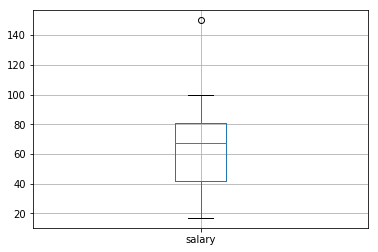

In [14]:
# Построим boxplot
sal[['salary']].boxplot()

In [15]:
# Посчитаем, сколько значений зарплат оказалось за пределами «усов»
boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
boxplot_range

(-16.5, 139.5)

In [16]:
# Найдем выбросы в выборке
outlers = sal.loc[(sal['salary'] < boxplot_range[0]) | (sal['salary'] > boxplot_range[1])]
outlers

,salary
19,150


### Задача 3.3

В университет на факультеты `A` и `B` поступило равное количество студентов, а на факультет `C` студентов поступило столько же, сколько на `A` и `B` вместе. Вероятность того, что студент факультета `A` сдаст первую сессию, равна 0.8. Для студента факультета `B` эта вероятность равна 0.7, а для студента факультета `C` - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете `A`? б) на факультете `B`? в) на факультете `C`?

_Замечание_: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

#### Решение

Для решения задачи необходимо перемножить вероятности случайного (т.к. мы не знаем какой студент, то считаем выбор случайным) выбора студента на вероятность того, что студент сдаст. Т.к. `A` и `B` равны и являются половиной `C`, то очевидно что вероятность случайного выбора $P(C) = 0.5$, а вероятности `A` и `B` равны соответственно $P(A) = P(B) = 0.25$. Определим соответственно вероятности сдачи каждого студента: $P(A_a) = 0.8, P(B_b) = 0.7, P(C_c) = 0.9$

Найдем полную вероятность, что сдатут все студенты:

$P = P(A) \cdot P(A_a) + P(B) \cdot P(B_b) + P(C) \cdot (C_c) $

In [17]:
P = 0.25 * 0.8 + 0.25 * 0.7 + 0.5 * 0.9
P

0.825

Найдем вероятности согласно формуле Байеса:
$$P(H_1\:|\:A) = \frac{P(A\:|\:Н_1) \cdot P(H_1)}{P}$$

Вероятность, что студент учится на факультете `A`:

In [18]:
P_H1 = 0.8 * 0.25 / 0.825
P_H1

0.24242424242424246

Вероятность, что студент учится на факультете `B`:

In [19]:
P_H2 = 0.25 * 0.7 / 0.825
P_H2

0.21212121212121213

Вероятность, что студент учится на факультете `C`:

In [20]:
P_H3 = 0.5 * 0.9 / 0.825
P_H3

0.5454545454545455

Проверка:

In [21]:
P_H1 + P_H2 + P_H3

1.0